## Bank Marketing

#### Abstract: The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

#### Step 1 : Asking the Right Question

#### Use Machine Learning workflow to process and transform Bank Marketing data to create a prediction model. This model must predict which people are likely to subscribe a term deposit with 70% or greater accuracy.

#### Step 2: Preparing data

##### Data Rule 1: Closer the data is to what you are predicting, the better.
##### Data Rule 2: Data will never be in format you need.
###### - columns to eliminate - not used, no values, duplicates.
###### - correlated columns - same information in different format, adds little values.
###### - Molding Data - adjust data types, create columns if required;
###### - Dealing with missing data - ignore , impute it;
##### Data Rule 3: Accurately predicting rare events is difficult;
##### Data Rule 4: Track how to manipulate data;

In [1]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.preprocessing import LabelEncoder
import random

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep=";")

In [3]:
len(df)

41188

In [4]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

### Check for null values

In [9]:
df.isnull().values.any()

False

In [10]:
df.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [11]:
target_col = ['y']
num_cols = df._get_numeric_data().columns
cat_cols = list(set(list(df.columns)) - set(num_cols) - set(target_col))

In [12]:
cat_cols

['marital',
 'day_of_week',
 'job',
 'month',
 'education',
 'housing',
 'contact',
 'loan',
 'poutcome',
 'default']

In [13]:
num_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

#### Feature scaling - to limit the range of variables to be compared on common grounds. It is performed on continuous variables;

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x084EE750>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x08AE4B10>]], dtype=object)

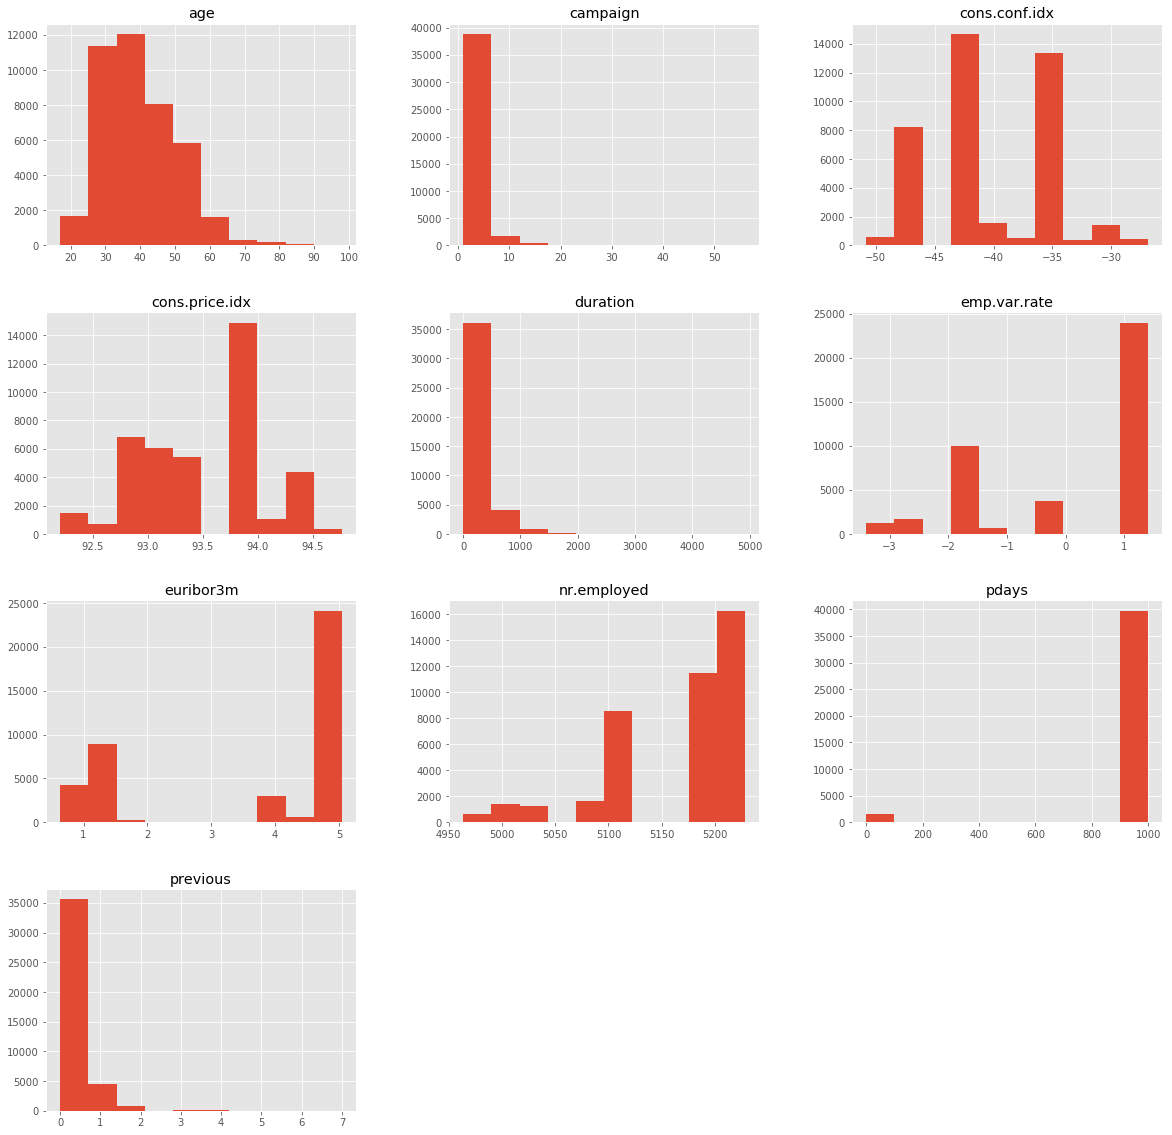

In [14]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

val = df.dtypes[num_cols].index.values
df[val].hist(figsize=[20, 20])

#### The categorical variables are of string type and hence must be converted to be used in the model via LabelEncoder.

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns.values:
    if df[col].dtypes=='object':
        data = df[col].append(df[col])
        le.fit(data.values)
        df[col]=le.transform(df[col])

In [16]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
5,45,7,1,2,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,5,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
7,41,1,1,7,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
8,24,9,2,5,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
9,25,7,2,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x086515B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x09351D30>]], dtype=object)

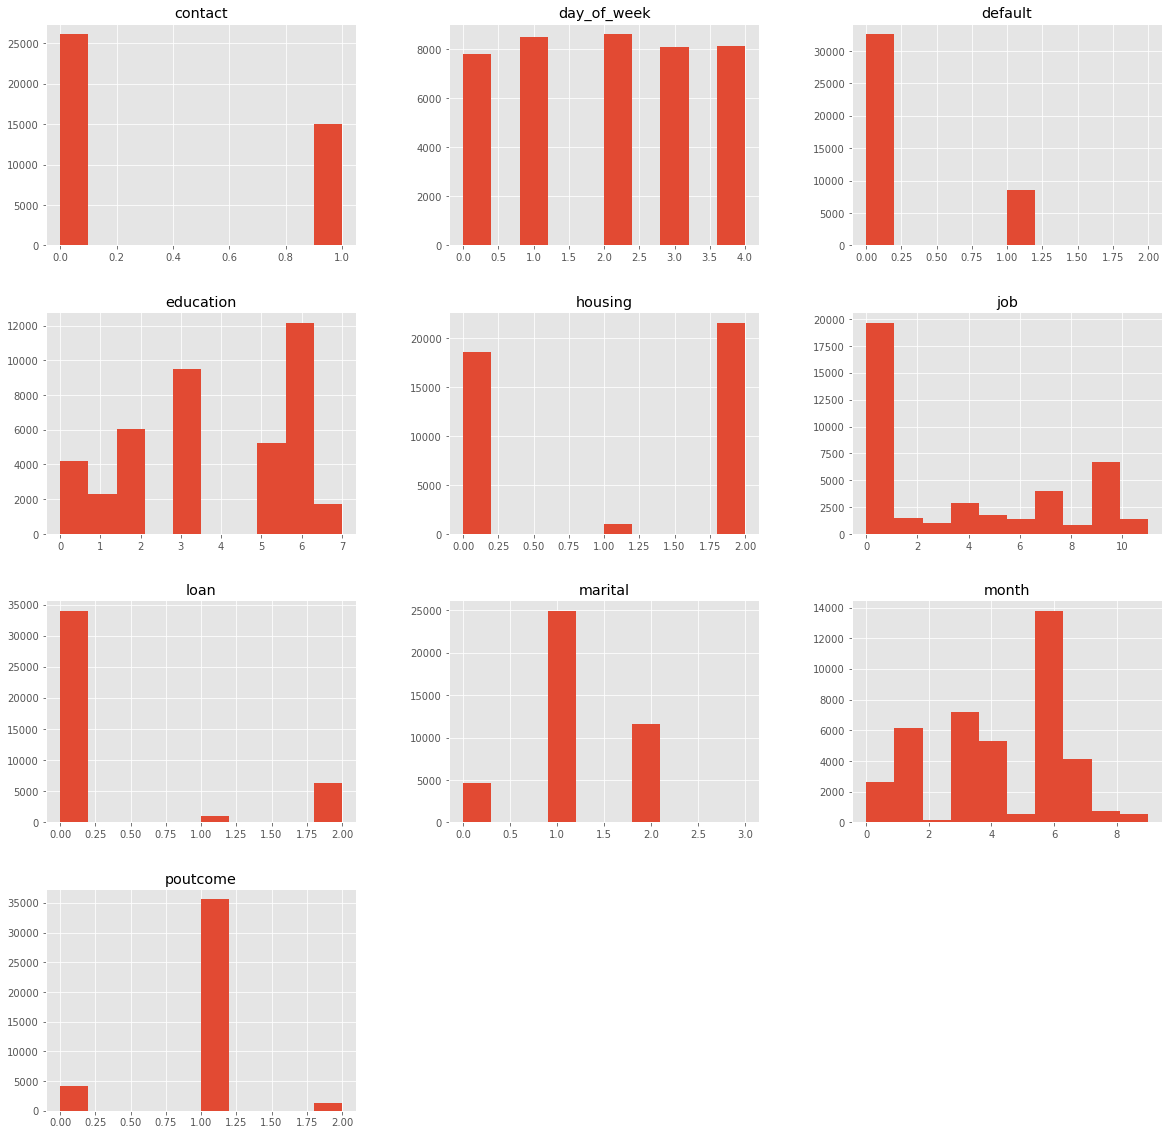

In [17]:
val = df.dtypes[cat_cols].index.values
df[val].hist(figsize=[20, 20])

In [18]:
def plot_corr(df, size=10):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.
    
    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot.
    
    Displays:
        Matrix of correlation between columns. Blue-cyan-yellow-red-dark-red => less to more correlated.
        
        0 ------------> 1 Expect a color to be running from top left to bottom right.
    """
    corr = df.corr() # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr) # color code the rectangles by correlation value.
    plt.xticks(range(len(corr.columns)), corr.columns) # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns) # draw y tick marks

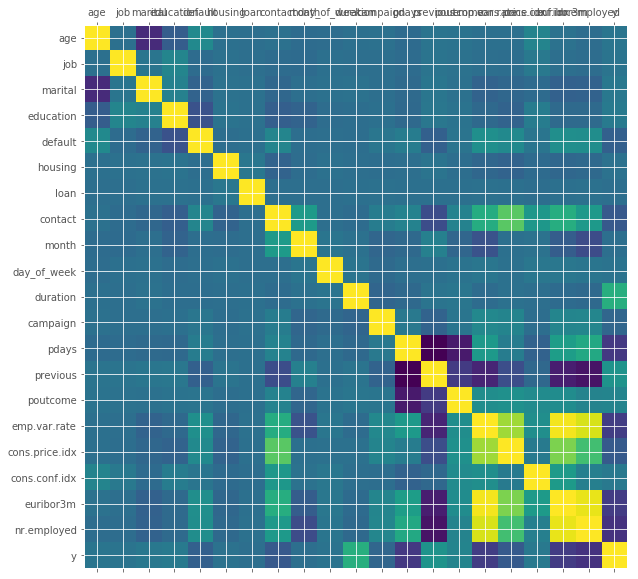

In [19]:
plot_corr(df)

#### Remove correlated fields

In [20]:
del df['euribor3m']

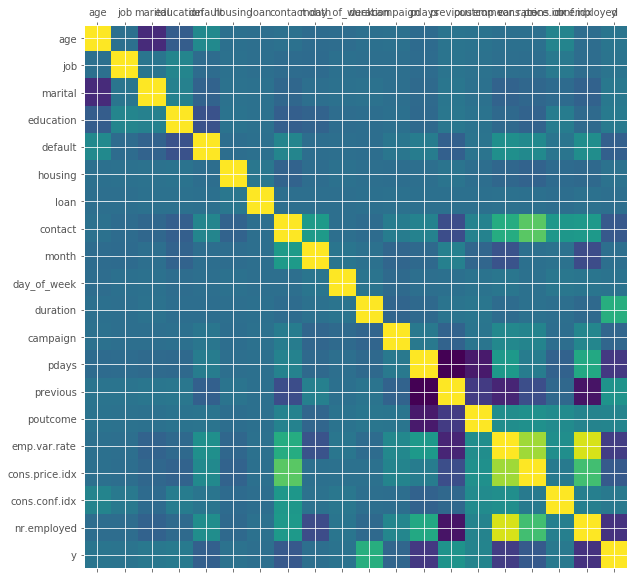

In [21]:
plot_corr(df)

### Check y/n ratio

In [22]:
num_yes = len(df.loc[df['y'] == 1])
num_no = len(df.loc[df['y'] == 0])
print("Number of Yes cases: {0} ({1:2.2f}%)".format(num_yes, (num_yes / (num_yes + num_no)) * 100))
print("Number of No cases: {0} ({1:2.2f}%)".format(num_no, (num_no / (num_yes + num_no)) * 100))

Number of Yes cases: 4640 (11.27%)
Number of No cases: 36548 (88.73%)


### Spliting the Data

#### 70% training; 30% testing;

In [23]:
from sklearn.model_selection import train_test_split

feature_col_names = ['age','job','marital','education','default','housing','loan','contact','month','day_of_week','duration',
                     'campaign','pdays','previous','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','nr.employed']
predicted_class_names = ['y']

x = df[feature_col_names].values # predictor feature columns (8 x m)
y = df[predicted_class_names].values # predictor class
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = split_test_size, random_state = 42) 

#### Ensure we have the desired 70% train, 30% test split of the data.

In [24]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

70.00% in training set
30.00% in test set


#### Verfying predicted values was split correctly

In [25]:
print("Original True : {0} ({1:0.2f}%)".format(len(df.loc[df['y'] == 1]), (len(df.loc[df['y'] == 1]) / len(df.index)) * 100 ))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['y'] == 0]), (len(df.loc[df['y'] == 0]) / len(df.index)) * 100 ))
print(" ")
print("Training True : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1]) / len(y_train)) * 100 ))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0]) / len(y_train)) * 100 ))
print(" ")
print("Test True : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1]) / len(y_test)) * 100 ))
print("Test False : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0]) / len(y_test)) * 100 ))

Original True : 4640 (11.27%)
Original False : 36548 (88.73%)
 
Training True : 3251 (11.28%)
Training False : 25580 (88.72%)
 
Test True : 1389 (11.24%)
Test False : 10968 (88.76%)


### A. Training Initial Algorithm - Naive Bayes

#### Step 3: Selecting the Algorithm

In [26]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

#### Step 4: Performance on Training Data

In [27]:
from sklearn import metrics

nb_predict_train = nb_model.predict(X_train)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.8490



#### Step 5: Performance on Testing Data

In [28]:
from sklearn import metrics

nb_predict_test = nb_model.predict(X_test)

#testing metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test,nb_predict_test)))
print(" ")
print("Confusion Matrix")
print(" ")
print("TP FP")
print("FN TN")
print(" ")
print("TP - true positive, actual subscribed loan and predicted subscribed loan.")
print("FN - false negative, actual subscribed loan, but predicted to be not subscribed loan.")
print("FP - false positive, actual not subscribed loan, but predicted to be subscribed loan.")
print("TN - true negative, actual not subscribed loan, and predicted to be not subscribed loan.")
print(" ")
print("Recall - tp rate & sensitivity, how well the model is predicting term deposit subscriber when result is term deposit subscriber")
print("Recall = TP / (TP + FN); it must be >= 70%")
print("Precision - Positive predictor value, this is how often the patient actually was a term deposit subscriber when the model said they would.")
print("Precision = TP / (TP + FP);")
print(" ")
# Note the use of labels for set 1 = True to upper left and 0 = False to lower right
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test, labels=[1,0])))
print(" ")
print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test, labels=[1,0]))

Accuracy: 0.8529
 
Confusion Matrix
 
TP FP
FN TN
 
TP - true positive, actual subscribed loan and predicted subscribed loan.
FN - false negative, actual subscribed loan, but predicted to be not subscribed loan.
FP - false positive, actual not subscribed loan, but predicted to be subscribed loan.
TN - true negative, actual not subscribed loan, and predicted to be not subscribed loan.
 
Recall - tp rate & sensitivity, how well the model is predicting term deposit subscriber when result is term deposit subscriber
Recall = TP / (TP + FN); it must be >= 70%
Precision - Positive predictor value, this is how often the patient actually was a term deposit subscriber when the model said they would.
Precision = TP / (TP + FP);
 
[[ 771  618]
 [1200 9768]]
 
Classification Report
             precision    recall  f1-score   support

          1       0.39      0.56      0.46      1389
          0       0.94      0.89      0.91     10968

avg / total       0.88      0.85      0.86     12357



### B. Training Algorithm - KNN(K nearest Neighbor)

#### Step 3: Selecting the Algorithm

In [29]:
from sklearn.neighbors import KNeighborsClassifier
nb_model = KNeighborsClassifier(n_neighbors=5)
nb_model.fit(X_train, y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

#### Step 4: Performance on Training Data

In [30]:
from sklearn import metrics

nb_predict_train = nb_model.predict(X_train)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.9306



#### Step 5: Performance on Testing Data

In [31]:
from sklearn import metrics

nb_predict_test = nb_model.predict(X_test)

#testing metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test,nb_predict_test)))
print(" ")
print("Confusion Matrix")
print(" ")
print("TP FP")
print("FN TN")
print(" ")
# Note the use of labels for set 1 = True to upper left and 0 = False to lower right
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test, labels=[1,0])))
print(" ")
print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test, labels=[1,0]))

Accuracy: 0.9034
 
Confusion Matrix
 
TP FP
FN TN
 
[[  666   723]
 [  471 10497]]
 
Classification Report
             precision    recall  f1-score   support

          1       0.59      0.48      0.53      1389
          0       0.94      0.96      0.95     10968

avg / total       0.90      0.90      0.90     12357



### C. Random Forest

#### Step 3: Selecting the Algorithm

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42) # Create random forest object
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

#### Step 4: Performance on Training Data

In [33]:
rf_predict_train = rf_model.predict(X_train)
#training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9933


#### Step 5: Performance on Testing Data

In [34]:
rf_predict_test = rf_model.predict(X_test)

#testing metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))
print(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1, 0]))
print(" ")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test, labels=[1,0]))

Accuracy: 0.9075
[[  596   793]
 [  350 10618]]
 
Classification Report
             precision    recall  f1-score   support

          1       0.63      0.43      0.51      1389
          0       0.93      0.97      0.95     10968

avg / total       0.90      0.91      0.90     12357



### D. Logistic Regression

#### Step 3: Selecting the Algorithm

In [35]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=42) # c - regularization parameter
lr_model.fit(X_train, y_train.ravel())

LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Step 4: Performance on Training Data

In [36]:
lr_predict_train = lr_model.predict(X_train)

#training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lr_predict_train)))

Accuracy: 0.9094


#### Step 5: Performance on Testing Data

In [37]:
lr_predict_test = lr_model.predict(X_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1, 0]))
print(" ")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test, labels=[1, 0]))

Accuracy: 0.9114
[[  566   823]
 [  272 10696]]
 
Classification Report
             precision    recall  f1-score   support

          1       0.68      0.41      0.51      1389
          0       0.93      0.98      0.95     10968

avg / total       0.90      0.91      0.90     12357



### Setting regularization Parameter

1st max value of 0.420 occured at C=3.300


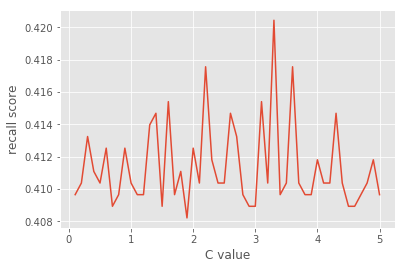

In [38]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

# Trying to achieve a recall of above 70% for the above case where it is 41%.

### Logistics regression with class_weight='balanced'

1st max value of 0.888 occured at C=0.100


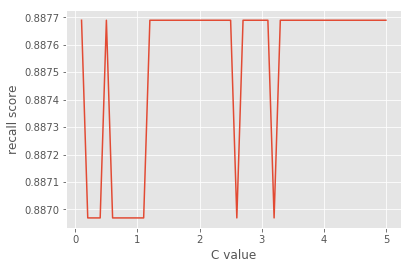

In [39]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while(C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc
        
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

#### Step 3: Selecting the Algorithm

In [40]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(class_weight="balanced", C=best_score_C_val, random_state=42)
lr_model.fit(X_train, y_train.ravel())

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

#### Step 4: Performance on Training Data

In [41]:
lr_predict_train = lr_model.predict(X_train)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lr_predict_train)))

Accuracy: 0.8510


#### Step 5: Performance on Testing Data

In [42]:
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1, 0]))
print(" ")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test, labels=[1, 0]))
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: 0.8509
[[1233  156]
 [1687 9281]]
 
Classification Report
             precision    recall  f1-score   support

          1       0.42      0.89      0.57      1389
          0       0.98      0.85      0.91     10968

avg / total       0.92      0.85      0.87     12357

0.887688984881


### E. LogisticRegressionCV (LogisticRegression + K-fold CrossValidation)

#### Step 3: Selecting the Algorithm

In [43]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=True, class_weight="balanced")
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

#### Step 4: Performance on Training Data

In [44]:
lr_cv_predict_train = lr_cv_model.predict(X_train)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lr_cv_predict_train)))

Accuracy: 0.8640


#### Step 5: Performance on Testing Data

In [45]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test, labels=[1, 0]))
print(" ")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

Accuracy: 0.8625
[[1182  207]
 [1492 9476]]
 
Classification Report
             precision    recall  f1-score   support

          0       0.98      0.86      0.92     10968
          1       0.44      0.85      0.58      1389

avg / total       0.92      0.86      0.88     12357

